<a href="https://colab.research.google.com/github/VivekParmar20/Project-2/blob/main/HTMotor2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HTMotor/current_data.csv')


<ipython-input-3-4220dceb786c>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/HTMotor/current_data.csv')


In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500000 entries, 0 to 4499999
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Temperature_housing_A  float64
 1   Temperature_housing_B  float64
 2   U-phase                float64
 3   V-phase                float64
 4   W-phase                float64
 5   Load                   int64  
 6   Fault_Type             object 
 7   Fault_Rate             object 
dtypes: float64(5), int64(1), object(2)
memory usage: 274.7+ MB
None


# New Section

In [ ]:
# Display basic statistics of the numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Temperature_housing_A  Temperature_housing_B       U-phase  \
count           4.500000e+06           4.500000e+06  4.500000e+06   
mean            2.916918e+01           2.976494e+01  3.752814e-02   
std             1.806220e+00           1.762659e+00  2.465118e+00   
min             2.495392e+01           2.518773e+01 -5.319266e+00   
25%             2.770916e+01           2.849670e+01 -2.374838e+00   
50%             2.891255e+01           2.984396e+01  4.433849e-02   
75%             3.097327e+01           3.106972e+01  2.427858e+00   
max             3.283752e+01           3.365687e+01  5.525884e+00   

            V-phase       W-phase          Load  
count  3.600000e+06  3.600000e+06  4.500000e+06  
mean  -7.642581e-02  3.645299e-02  2.000000e+00  
std    2.451960e+00  1.921262e+00  1.632993e+00  
min   -5.466884e+00 -4.125228e+00  0.000000e+00  
25%   -2.464072e+00 -1.836988e+00  0.000000e+00  
50%   -9.039466e-02  4.646222e-02  2.000000e+00  
75%    

In [ ]:
df.isnull().sum()

Temperature_housing_A         0
Temperature_housing_B         0
U-phase                       0
V-phase                  900000
W-phase                  900000
Load                          0
Fault_Type                    0
Fault_Rate                    0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

Temperature_housing_A    0
Temperature_housing_B    0
U-phase                  0
V-phase                  0
W-phase                  0
Load                     0
Fault_Type               0
Fault_Rate               0
dtype: int64

In [ ]:
df = df.drop(columns=['Fault_Rate'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600000 entries, 0 to 4499999
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Temperature_housing_A  float64
 1   Temperature_housing_B  float64
 2   U-phase                float64
 3   V-phase                float64
 4   W-phase                float64
 5   Load                   int64  
 6   Fault_Type             object 
dtypes: float64(5), int64(1), object(1)
memory usage: 219.7+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df['Fault_Type'] = label_encoder.fit_transform(df['Fault_Type'])



In [ ]:
encoded_values = df['Fault_Type'].unique()

# Decode the values
decoded_values = label_encoder.inverse_transform(encoded_values)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Encoded': encoded_values, 'Decoded': decoded_values})

# Print the result
print(result_df)

   Encoded     Decoded
0        0        BPFI
1        1    Misalign
2        2  Normal.csv
3        3   Unbalance


In [ ]:
unique_values = df['Fault_Type'].unique()

# Print the unique values
print("Unique Values in 'Fault_Type':", unique_values)

Unique Values in 'Fault_Type': [0 1 2 3]


<Figure size 1800x1000 with 0 Axes>

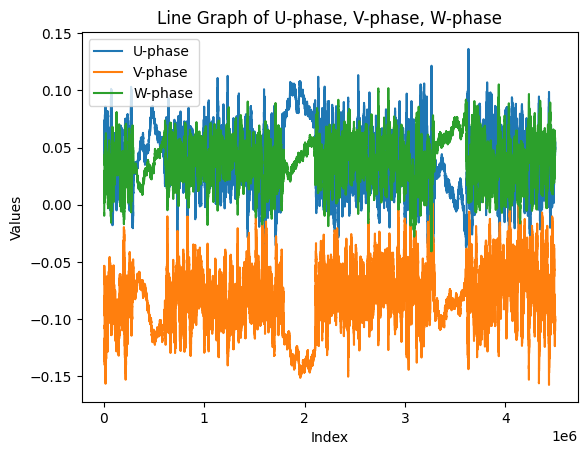

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_reset = df.reset_index()


# Applying a rolling mean to smooth the lines
window_size = 10000  # Adjust the window size as needed
df_smoothed = df_reset.rolling(window=window_size).mean()

plt.figure(figsize=(18, 10))

# Plotting
df_smoothed.plot(x='index', y=['U-phase', 'V-phase', 'W-phase'][:1000], kind='line')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Graph of U-phase, V-phase, W-phase')

# Show the plot
plt.show()

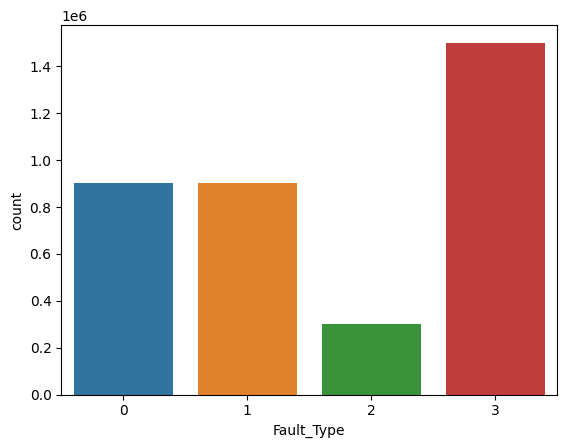

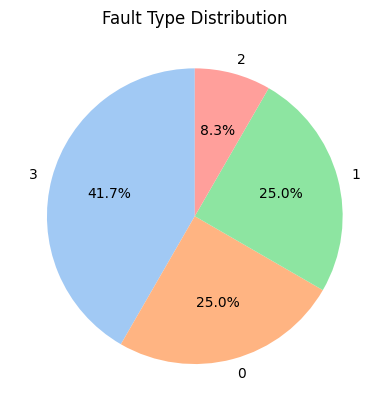

In [ ]:
sns.countplot(x='Fault_Type', data=df)
plt.show()

fault_type_counts = df['Fault_Type'].value_counts()
plt.pie(fault_type_counts, labels=fault_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Fault Type Distribution')
plt.show()

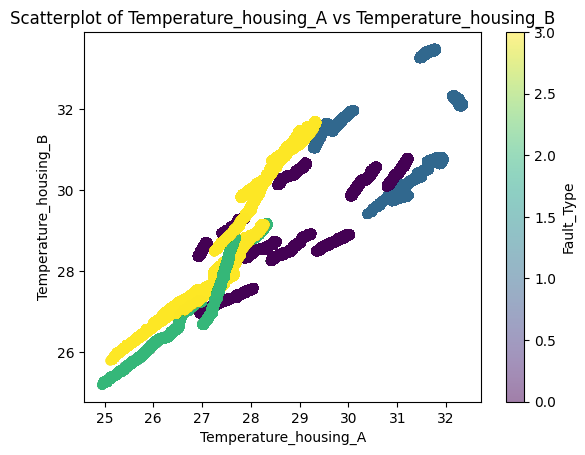

In [ ]:
plt.scatter(df['Temperature_housing_A'], df['Temperature_housing_B'], c=df['Fault_Type'], cmap='viridis', alpha=0.5)
plt.xlabel('Temperature_housing_A')
plt.ylabel('Temperature_housing_B')
plt.title('Scatterplot of Temperature_housing_A vs Temperature_housing_B')
plt.colorbar(label='Fault_Type')
plt.show()

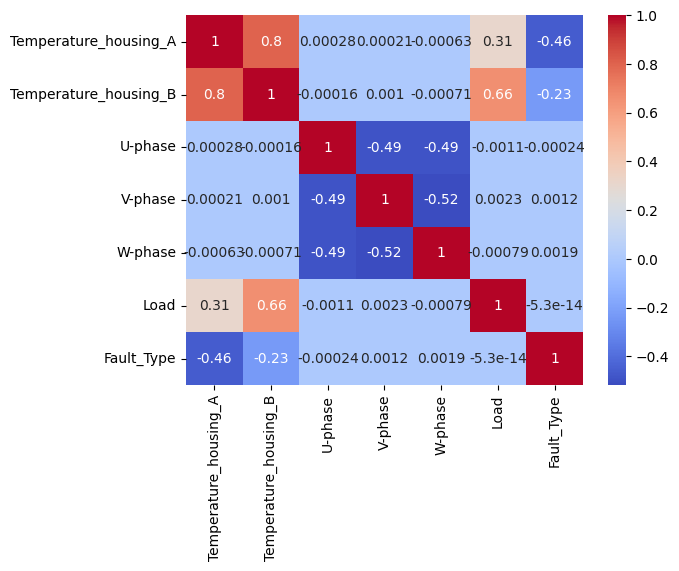

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
correlation_matrix = df.corr()

# Print the correlation matrix
correlation_matrix

,Temperature_housing_A,Temperature_housing_B,U-phase,V-phase,W-phase,Load,Fault_Type
Temperature_housing_A,1.000000,0.801343,0.000284,0.000206,-0.000625,3.094382e-01,-4.603242e-01
Temperature_housing_B,0.801343,1.000000,-0.000160,0.001009,-0.000712,6.564700e-01,-2.329371e-01
U-phase,0.000284,-0.000160,1.000000,-0.489946,-0.491746,-1.134385e-03,-2.406610e-04
V-phase,0.000206,0.001009,-0.489946,1.000000,-0.517568,2.252337e-03,1.181972e-03
W-phase,-0.000625,-0.000712,-0.491746,-0.517568,1.000000,-7.949232e-04,1.865414e-03
Load,0.309438,0.656470,-0.001134,0.002252,-0.000795,1.000000e+00,-5.332098e-14
Fault_Type,-0.460324,-0.232937,-0.000241,0.001182,0.001865,-5.332098e-14,1.000000e+00


**Temperature_housing_A and Temperature_housing_B**: There is a strong positive correlation (0.80) between these two features, indicating that as the temperature in housing A increases, the temperature in housing B also tends to increase.

**Temperature_housing_A and U-phase**: The correlation between Temperature_housing_A and U-phase is very close to zero (0.00), suggesting a weak or negligible correlation.

**Temperature_housing_B and U-phase**: Similarly, there is a very weak or negligible correlation (close to zero) between Temperature_housing_B and U-phase.

**U-phase and V-phase**: There is a negative correlation (-0.49) between U-phase and V-phase. This suggests an inverse relationship, meaning that as U-phase increases, V-phase tends to decrease.

**U-phase and W-phase**: Similar to U-phase and V-phase, there is a negative correlation (-0.49) between U-phase and W-phase.

**Load and Temperature_housing_A/B**: Both Temperature_housing_A and Temperature_housing_B have positive correlations with Load, indicating that as temperatures in the housings increase, the load also tends to increase.

**Fault_Type and other features**: The correlation values with Fault_Type are relatively small, indicating a weak linear relationship. Negative values suggest a potential inverse relationship, but the correlations are not strong.

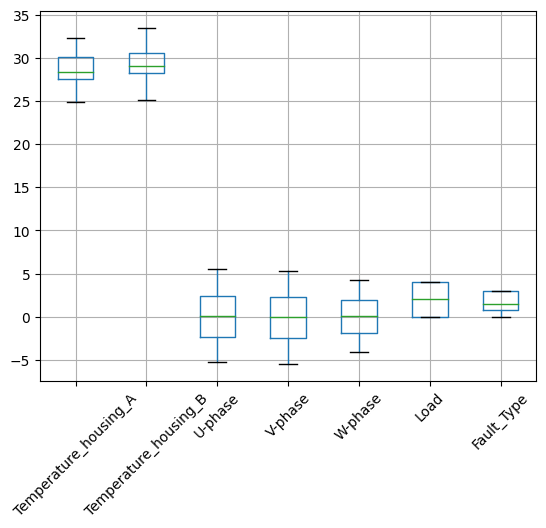

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(rot=45)
plt.show()

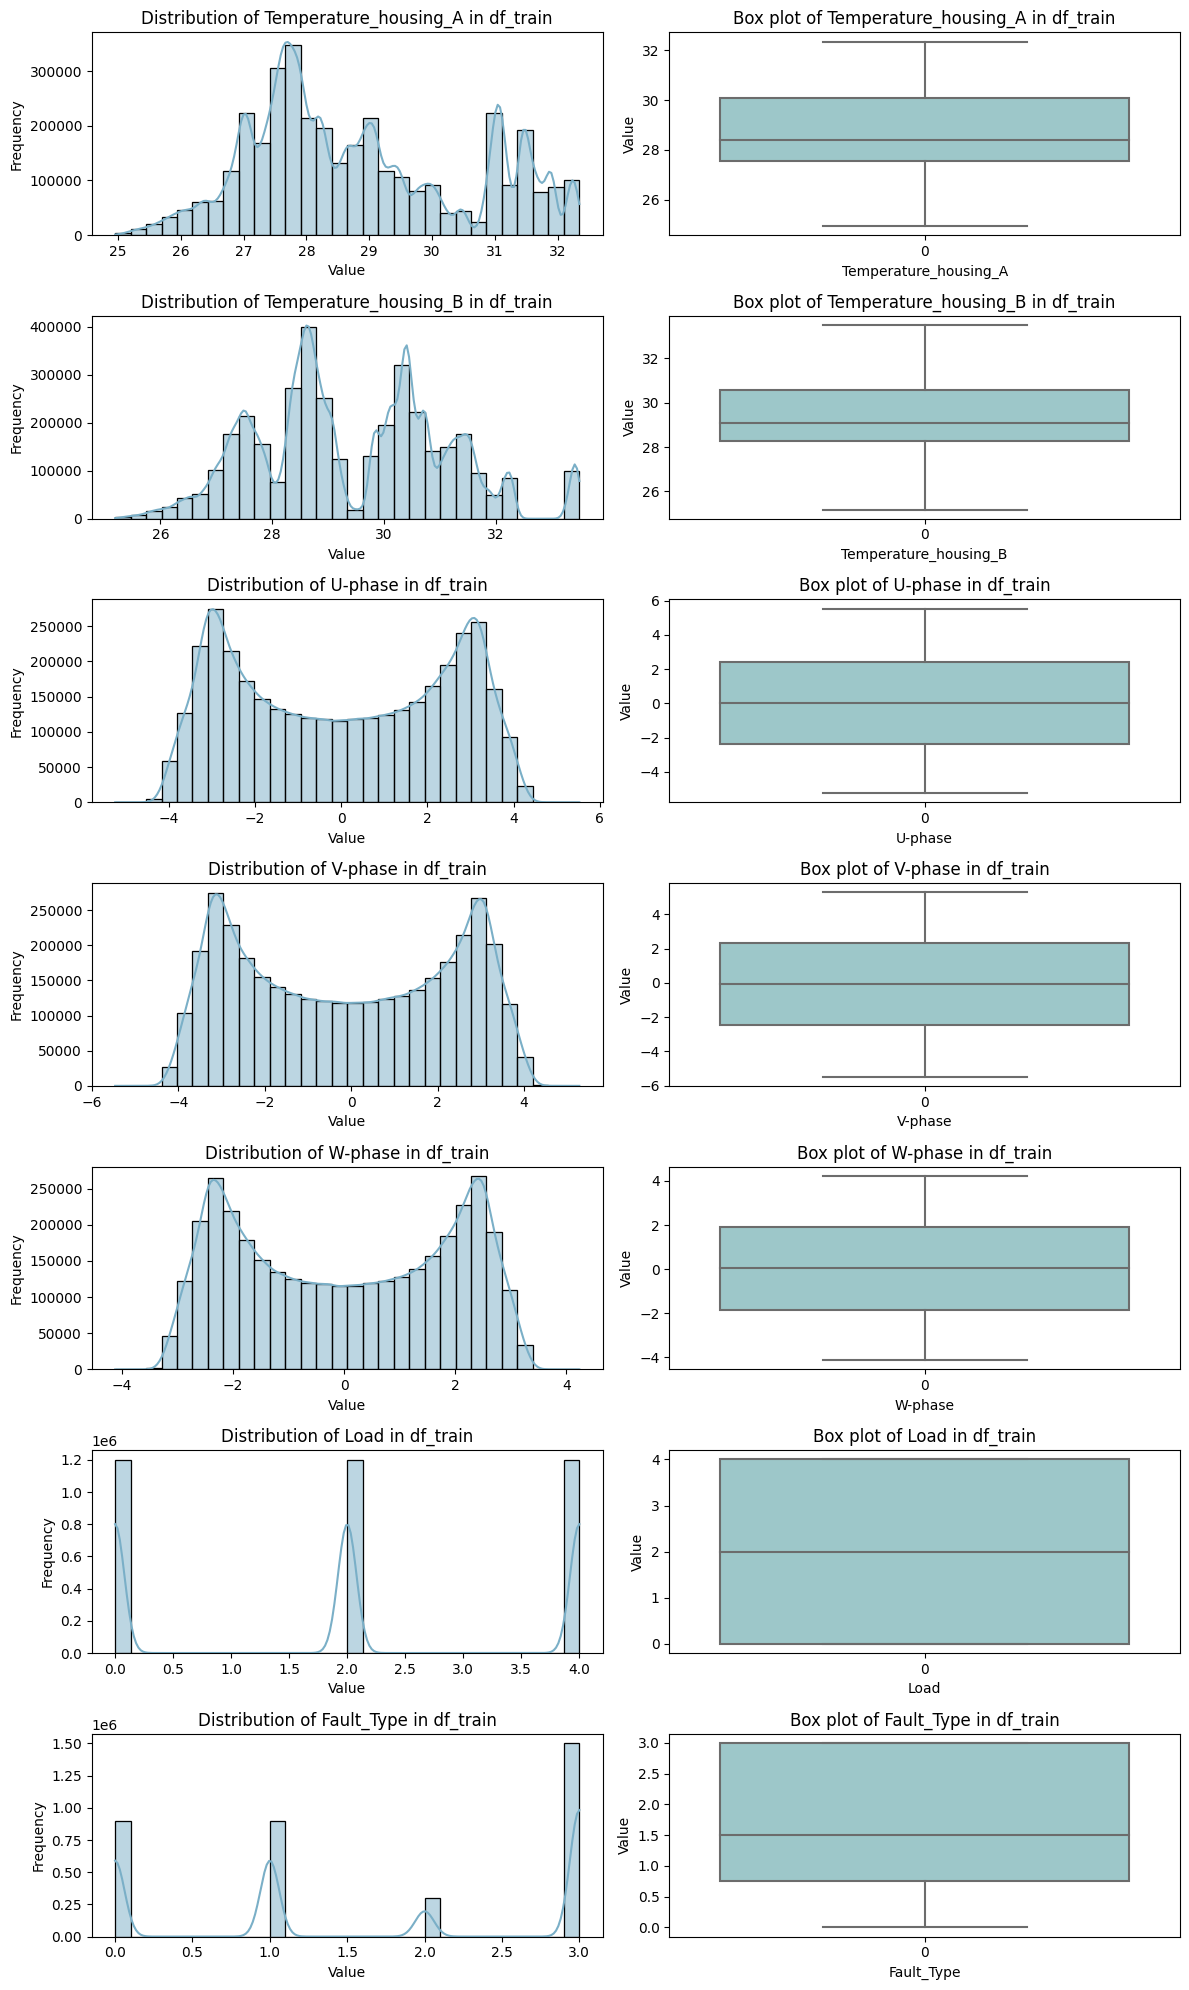

In [ ]:
num_cols = [
    'Temperature_housing_A',
    'Temperature_housing_B',
    'U-phase',
    'V-phase',
    'W-phase',
    'Load',
    'Fault_Type'
]

my_palette = sns.cubehelix_palette(n_colors = 7, start=.46, rot=-.45, dark = .2, hue=0.95)

# Check basic statistics for numerical columns in train data
numerical_columns = num_cols

# Create subplots
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(12, 20))

# Plot the histograms and box plots
for i, column in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i, 0], color = my_palette[2])
    axes[i, 0].set_title(f'Distribution of {column} in df_train')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Box plot
    sns.boxplot(df[column], ax=axes[i, 1], color = my_palette[1])
    axes[i, 1].set_title(f'Box plot of {column} in df_train')
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame with features and labels
# Adjust the column names as per your dataset
X = df.drop('Fault_Type', axis=1)
y = df['Fault_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier with OvO strategy
logreg_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the classifier
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:')
print(classification_rep)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.79
Confusion Matrix:
[[113620    298     62  66013]
 [  9461 170657      0    254]
 [  2891      0  16148  40906]
 [ 21998  10920   1406 265366]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.63      0.69    179993
           1       0.94      0.95      0.94    180372
           2       0.92      0.27      0.42     59945
           3       0.71      0.89      0.79    299690

    accuracy                           0.79    720000
   macro avg       0.83      0.68      0.71    720000
weighted avg       0.80      0.79      0.77    720000



In [ ]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(logreg_classifier, pickle_out)
pickle_out.close()